# Compare Credibility Sets

**Created**: 4 February 2022

## Environment

In [1]:
if (!requireNamespace("Rcpp", quietly=T)) {
    install.packages("Rcpp")
}

In [2]:
library(tidyverse)
library(data.table)
library(Rcpp)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
Rcpp::sourceCpp("01_Colocalization/scripts/utils/varition_of_information.cpp")

## Load Data

In [4]:
cis.eqtl.conditional <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/eqtl/cisresults/conditionalanalysis/conditional_eQTL_results_final.rds")

In [5]:
head(cis.eqtl.conditional)

,SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,rs10753794,ENSG00000000457,0.0498587312408011,0.00708515851579373,5.19259471106013e-12,1
2,rs10919255,ENSG00000000460,-0.0726264894633498,0.0136853304567293,1.72815915933528e-07,1
3,rs77006036,ENSG00000000460,0.166236949102582,0.0334472538699365,8.47290238610159e-07,2
4,rs12406047,ENSG00000000971,0.17135374034767,0.0379807691167313,7.51523462853891e-06,1
5,rs6696136,ENSG00000001460,0.45884434698694,0.0871081626842823,1.94887370606405e-07,1
6,rs6676449,ENSG00000001460,-0.371531778822554,0.0880672792106829,2.8471651589813e-05,2


In [167]:
susie.snps <- lapply(1:22, function(chr) {
    read.table(paste0("~/gains_team282/nikhil/colocalization/cis_eqtl/fine_mapping/SuSiE/chr", chr, "_credible_sets.tsv"), sep="\t", header=T)
}) %>% do.call(rbind, .) %>%
    as.data.frame() %>%
    dplyr::filter(is.na(Notes)) %>%
    dplyr::select(-Notes)

In [168]:
head(susie.snps)

,Gene,SNP,SNP_Prob,Credible_Set
,<chr>,<chr>,<dbl>,<int>
1,ENSG00000259834,rs11585237,0.12036728,1
2,ENSG00000259834,rs7513434,0.12036728,1
3,ENSG00000259834,rs12076724,0.11845741,1
4,ENSG00000259834,rs35508122,0.11845741,1
5,ENSG00000259834,rs6668335,0.11492271,1
6,ENSG00000259834,rs11585482,0.07350796,1


In [165]:
finemap.snps <- lapply(1:22, function(chr) {
    fread(paste0("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/fine_mapping/FINEMAP/chr", chr, "_credible_sets.tsv"), sep="\t", header=TRUE) %>%
        as.data.frame() %>%
        dplyr::group_by(Gene) %>%
        dplyr::filter(Post_Prob_k == max(Post_Prob_k))
}) %>% do.call(rbind, .) %>%
    as.data.frame()

In [166]:
head(finemap.snps)

,Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10753794,0.0998957
2,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10919236,0.0998957
3,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10919237,0.0770358
4,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs12404614,0.0770358
5,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs6683782,0.0770358
6,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs6701718,0.0770358


## SuSiE Credible Sets

Of the 10618 eGenes detected in the cohort, 8656 have at least one credibility set.

In [169]:
length(unique(susie.snps$Gene))
length(unique(cis.eqtl.conditional$Gene))

[1] 8656

[1] 10618

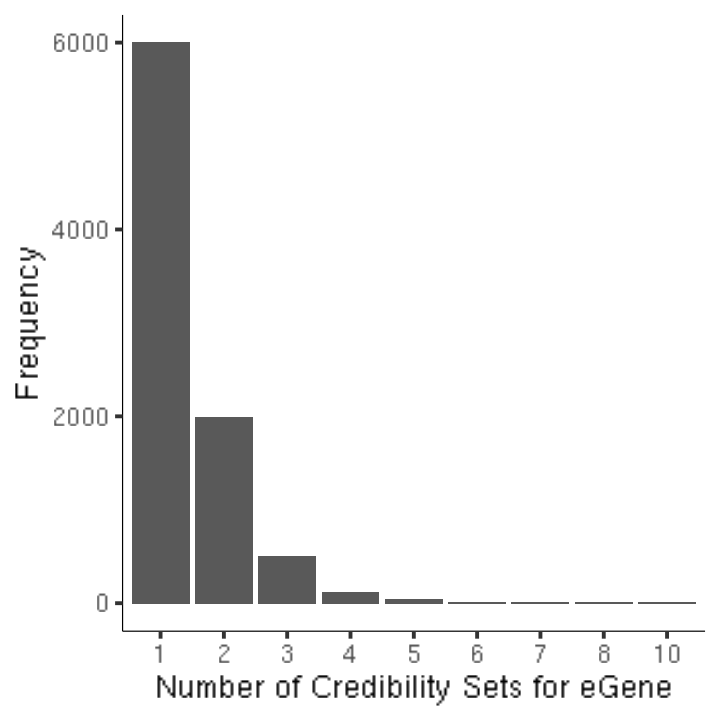

In [170]:
options(repr.plot.width=6, repr.plot.height=6)

susie.snps %>%
    dplyr::group_by(Gene) %>%
    dplyr::summarize(N.CS=length(unique(Credible_Set))) %>%
    dplyr::mutate(N.CS=factor(N.CS, levels=1:(max(N.CS)))) %>%
    ggplot() +
    geom_bar(aes(x=N.CS)) +
    xlab("Number of Credibility Sets for eGene") + ylab("Frequency") +
    ggplot_theme

ggsave("01_Colocalization/results/susie_number_of_credibility_sets.svg", width=6, height=6)

## FINEMAP Credible Sets

All of the 10618 eGenes have at least one credibility set.

In [27]:
length(unique(finemap.snps$Gene))
length(unique(cis.eqtl.conditional$Gene))

[1] 10618

[1] 10618

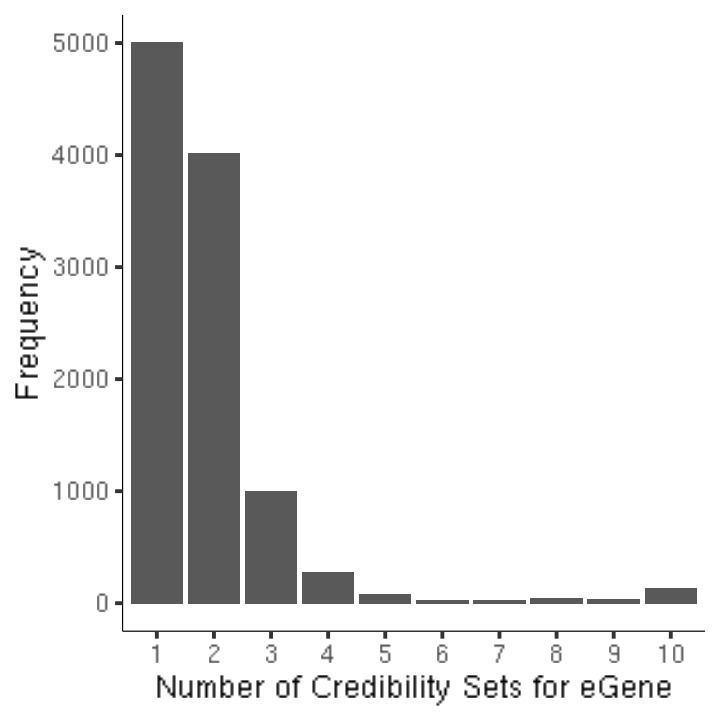

In [28]:
options(repr.plot.width=6, repr.plot.height=6)

finemap.snps %>%
    dplyr::select(Gene, k) %>%
    unique() %>%
    dplyr::mutate(k=factor(k, levels=1:(max(k)))) %>%
    ggplot() +
    geom_bar(aes(x=k)) +
    xlab("Number of Credibility Sets for eGene") + ylab("Frequency") +
    ggplot_theme

ggsave("01_Colocalization/results/finemap_number_of_credibility_sets.svg", width=6, height=6)

FINEMAP also reports statistics about the LD of SNPs within credibility sets.

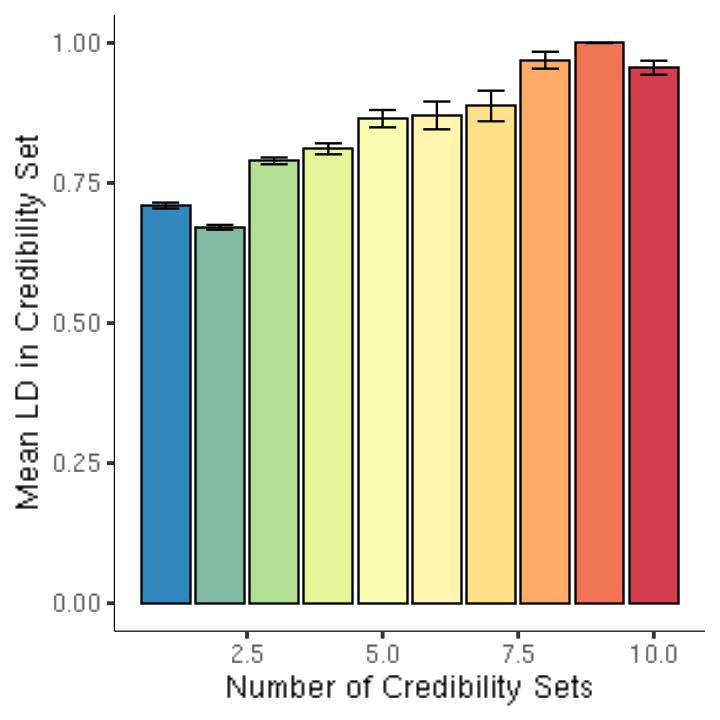

In [29]:
options(repr.plot.width=6, repr.plot.height=6)

finemap.snps %>%
    dplyr::select(Gene, k, Credibility_Set_Mean_LD) %>%
    unique() %>%
    ggplot(aes(x=k, y=Credibility_Set_Mean_LD, fill=k)) +
    stat_summary(geom="bar", fun=mean, position="dodge", color="black") +
    stat_summary(geom="errorbar", fun.data=mean_se, position="dodge", width=0.5) +
    xlab("Number of Credibility Sets") + ylab("Mean LD in Credibility Set") +
    guides(fill="none") +
    scale_fill_distiller(palette="Spectral") +
    ggplot_theme

ggsave("01_Colocalization/results/finemap_credibility_sets_mean_ld.svg", width=6, height=6)

## Sentinel SNPs from Conditional Analysis

I begin by making some very basic comparisons. First, I compare the distance in the number of signals captured by either the conditional analysis or the FINEMAP credibility sets. Around 72% of eGenes have the same number of signals. That is, $|k_c - k_f| \leq 0$. As we increase the neighborhood, the number of eGenes quickly reaches saturation. For instance, 96% of eGenes are $|k_c - k_f| \leq 1$. That is, 96% of eGenes agree with the number of signals from both methods with an error of one signal.

In [87]:
k.comparison <- merge(
    cis.eqtl.conditional %>%
        dplyr::group_by(Gene) %>%
        dplyr::summarize(Conditional.K=n()),
    finemap.snps %>%
        dplyr::select(Gene, FINEMAP.K=k) %>%
        unique(),
    by="Gene"
)

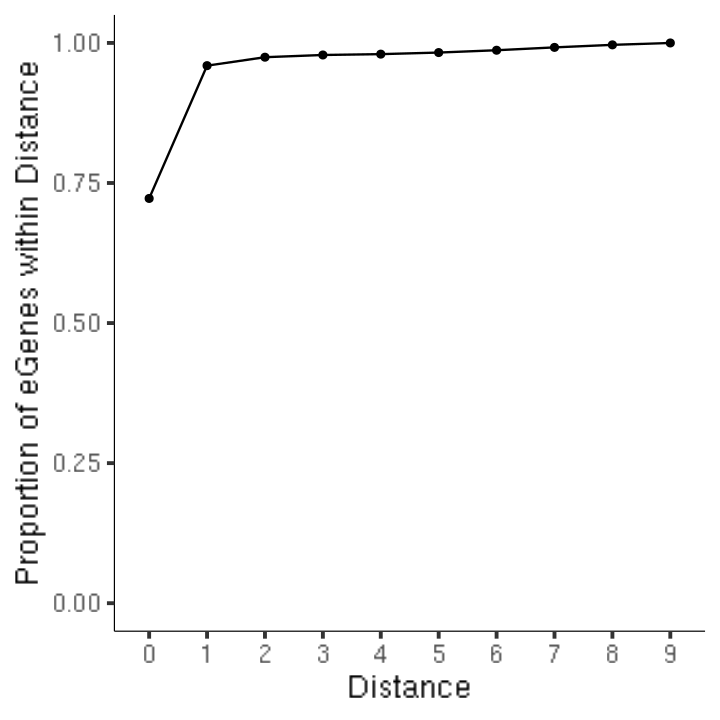

In [147]:
proportions <- sapply(0:9, function(threshold) {
    sum(abs(k.comparison$Conditional.K - k.comparison$FINEMAP.K) <= threshold) / nrow(k.comparison)
})

options(repr.plot.width=6, repr.plot.height=6)

data.frame(
    Distance=factor(0:9),
    Proportion=proportions
) %>%
    ggplot(aes(x=Distance, y=Proportion, group=1)) +
    geom_point() +
    geom_line() +
    ylim(0, 1) +
    xlab("Distance") + ylab("Proportion of eGenes within Distance") +
    ggplot_theme

ggsave("01_Colocalization/results/conditional_finemap_comparison.svg", width=6, height=6)

I also plotted the density of the agreement between the signals detected by the two methods. FINEMAP tends to identify more signals than the conditional analysis.

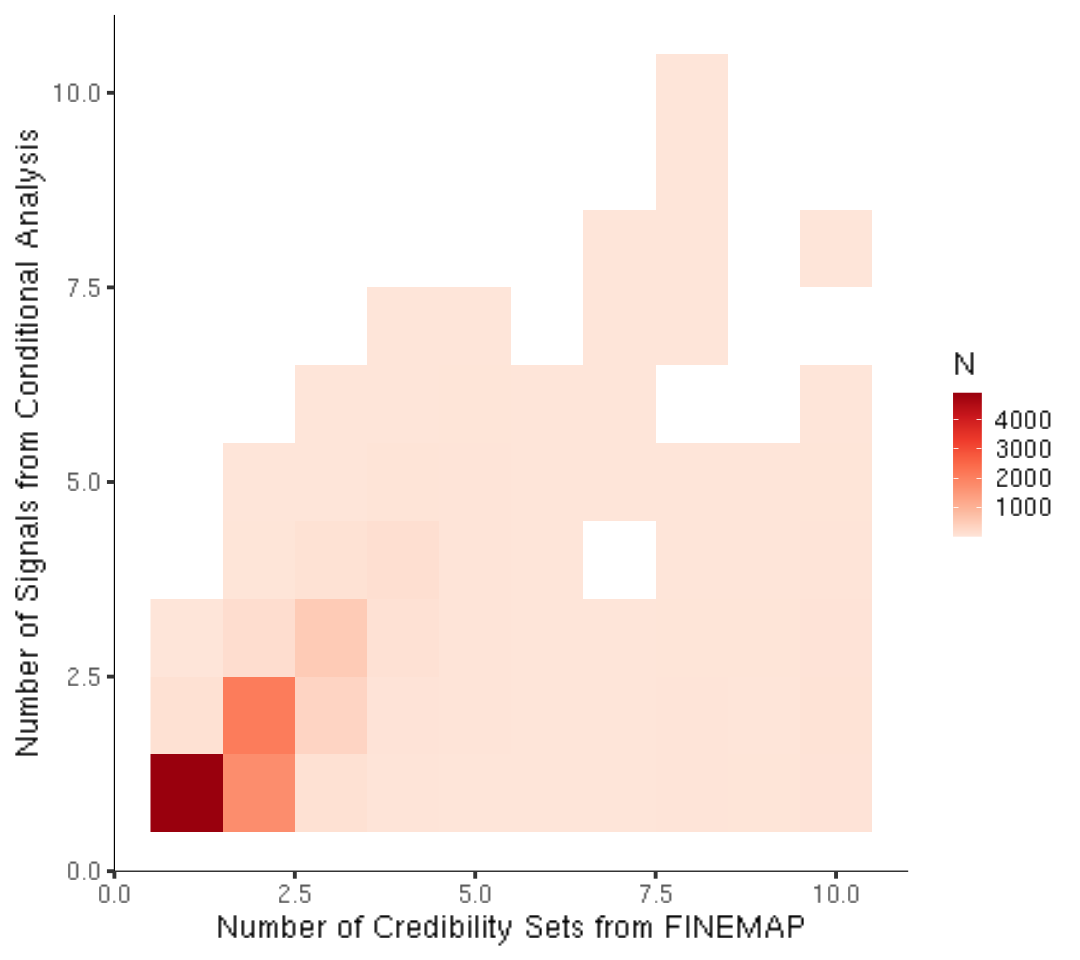

In [148]:
options(repr.plot.width=9, repr.plot.height=8)

k.comparison %>%
    dplyr::group_by(Conditional.K, FINEMAP.K) %>%
    dplyr::summarize(N=n(), .groups="drop") %>%
    ggplot(aes(x=FINEMAP.K, y=Conditional.K, fill=N)) +
    geom_raster() +
    xlab("Number of Credibility Sets from FINEMAP") + ylab("Number of Signals from Conditional Analysis") +
    scale_fill_distiller(palette="Reds", direction=1) +
    ggplot_theme + theme(legend.position="right")

ggsave("01_Colocalization/results/conditional_finemap_density.svg", width=9, height=8)

Another simple measure is to ask how many conditional eSNPs fall within a credibility set. 91% of eSNPs from the conditional analysis are covered by a FINEMAP credibility set from the same locus.

In [172]:
eGenes.with.CS.mask <- paste0(cis.eqtl.conditional$Gene, "-", cis.eqtl.conditional$SNP) %in% paste0(finemap.snps$Gene, "-", finemap.snps$SNP)
sum(eGenes.with.CS.mask) / nrow(cis.eqtl.conditional)

[1] 0.9129812

To better understand the distribution of conditional eSNPs within FINEMAP credibility sets, I will restrict myself to this subset of 91% of eSNPs that fill within one of the credibility sets at the same locus. For these eSNPs, I will calculate the entropy with regards to the credibility sets. A high entropy implies better distribution of eSNPs within the credibility sets, which would in turn suggest that the same pattern of association is being picked up by both methods.

In [177]:
snps.in.CS <- split(
    cis.eqtl.conditional$SNP[eGenes.with.CS.mask],
    cis.eqtl.conditional$Gene[eGenes.with.CS.mask]
)

In [185]:
gene = names(snps.in.CS)[2]

In [186]:
CS <- split(
    finemap.snps$SNP[finemap.snps$Gene == gene],
    finemap.snps$Credibility_Set[finemap.snps$Gene == gene]
)

if (length(snps.in.CS[[gene]]) == 1) {
    return(sum(snps.in.CS[[gene]] %in% CS[[1]]))
}

sum(snps.in.CS[[gene]] %in% CS